# iris 데이터를 통한 기본적인 군집분석 원리와 분석과정 연습

### 군집분석이란?
- unsupervised learning으로, 데이터 간의 유사도를 정의하고 그 유사도에 가까운 것부터 순서대로 합쳐가는 방법이며, 유사도의 정의에는 거리나 상관계수 등 여러가지가 있다.

### 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 컬럼명 변경
column_name_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# iris_df.columns = column_name_list

columns_replace_dict = {k:v for k, v in zip(iris.feature_names, column_name_list)}

In [ ]:
iris_df.rename(columns_replace_dict, axis="columns", inplace=True)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# target 컬럼 추가
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.target.unique()

array([0, 1, 2])

In [ ]:
### 결측값 확인
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [ ]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
import plotly.express as px
fig=px.scatter(iris_df, x='sepal_length', y='sepal_width')
fig.update_layout(width = 600, height=500) # 사이즈 조정
fig.show()

In [ ]:
fig=px.scatter(iris_df, x='sepal_length', y='sepal_width', color='target')
fig.update_layout(width = 600, height=500) # 사이즈 조정
fig.show()

In [ ]:
# 다른 컬럼으로 만들기
fig=px.scatter(iris_df, x='petal_length', y='petal_width', color='target')
fig.update_layout(width = 600, height=500) # 사이즈 조정
fig.show()

### K-Means 알고리즘

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = iris_df.iloc[:,:-1]
Y = iris_df.iloc[:,-1]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

120 30


In [ ]:
# 5개의 그룹으로 clustering
km = KMeans(n_clusters=5)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km.fit(train_x)
clusters_array = km.labels_

In [ ]:
# 실제 iris 데이터의 그룹과 훈련된 cluster의 결과를 비교
compare_clusters = dict(zip(clusters_array, train_y))
compare_clusters

{0: 2, 1: 0, 2: 2, 3: 2, 4: 1}

In [ ]:
# 훈련된 label 기준으로 시각화
fig = px.scatter(x=train_x['petal_width'], y=train_x['petal_length'], color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
# 훈련된 label 기준으로 시각화
fig = px.scatter(x=train_x['sepal_width'], y=train_x['sepal_length'], color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()

- 각 클러스터의 중심점에서 데이터 간의 거리를 합한 수치

In [ ]:
# Sum of squared distances of samples to their closest cluster center. 
km.inertia_ 

35.93355357927097

### 최적의 k 찾기 (Elbow method)
- unsupervised 방법으로 실제 k의 수는 정해져있지 않기에 최적의 k를 찾는 것부터 시작.

  > Elbow method란?
  
  > Total intra-cluster variation(or total within-cluster sum of suqare(=WSS))가 최소가 되는 k를 찾는 방법.

In [ ]:
# k와 sum of squared distsances from each point의 합(distortion)을 비교

distortions = []
k_range = range(1, 11)
for i in k_range:
  print(i)
  km = KMeans(n_clusters=i)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

1
2
3
4
5
6
7
8
9
10
[531.1055, 127.32131054131054, 62.18794444444444, 44.537817139001355, 35.93355357927097, 30.702786141210872, 26.4712779497764, 23.105828781512606, 21.5410668767507, 20.45304761866101]


In [ ]:
# x축이 k의 수, y축이 distortions인 line plot 그리기
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=600)
fig.show()

- model 훈련과 함께 그래프를 그려주고 훈련 시간까지 확인해주는 모듈인 KElbowVisualizer 사용

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



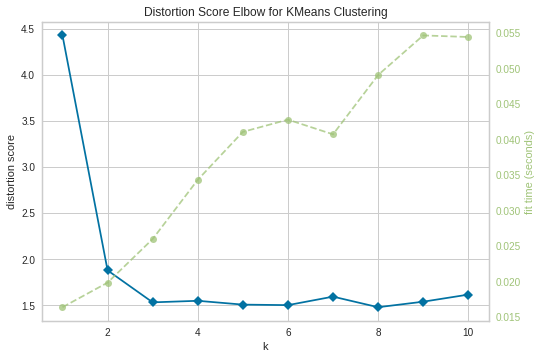

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(1, 11))
visualizer.fit(train_x)
visualizer.poof()

In [ ]:
!pip install kneed

In [ ]:
# 그래프 확인 없이 최적 k값을 자동으로 찾아줌
from kneed import KneeLocator

kneedle = KneeLocator(x=k_range, y=distortions, curve='convex', direction='decreasing')
kneedle.elbow

3

In [ ]:
kneedle = KneeLocator(x=k_range, y=distortions, curve='convex', direction='decreasing')
kneedle.elbow_y

62.18794444444444

- k가 3일 때, y가 59.499인 것을 확인할 수 있음.

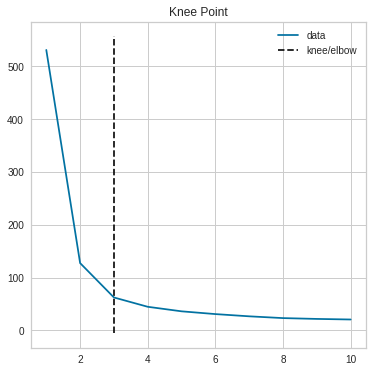

In [ ]:
kneedle.plot_knee()

### Silhouette method
> Cluster 내의 거리와 clusterrksdml 거리를 사용한 계수로 Silhouette coefficient(SC)값이 최대가 되는 k를 찾는 방법.

> SC해석이란?

> 각 cluster 사이의 거리가 멀고 cluster 내 데이터의 거리가 작을 수록 군집 분석의 성능이 좋음. 

>Silhouette 값은 -1에서 1까지 가능하며, 0일 경우에는 cluster간의 변별력이 없다는 의미. -1에 가까울 수록 clustering의 결과가 좋지 않음을 의미.

In [ ]:
# silhouette_score는 array 형태를 읽을 수 있으며, 군집 간의 거리 계산을 필요로 하기에 최소 2개 이상의 label/cluster가 있어야 함.
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)
for i in k_range:
  print(i)
  km = KMeans(n_clusters=i)
  km.fit(train_x)
  label=km.predict(train_x)
  sc_value=silhouette_score(np.array(train_x), label, metric='euclidean', sample_size=None, random_state=None)
  silhouette_scores.append(sc_value)

print(silhouette_scores)

2
3
4
5
6
7
8
9
10
[0.6728582207486113, 0.559785543831039, 0.4875083845359401, 0.47948279174632175, 0.3694385726282608, 0.3452392773773775, 0.36205541090746796, 0.32060953395233666, 0.3391393026230868]


In [ ]:
fig = px.line(x=k_range, y=silhouette_scores, labels={"x":"k","y":"silhouette scores"})
fig.update_layout(width=800, height=500)
fig.show()

2


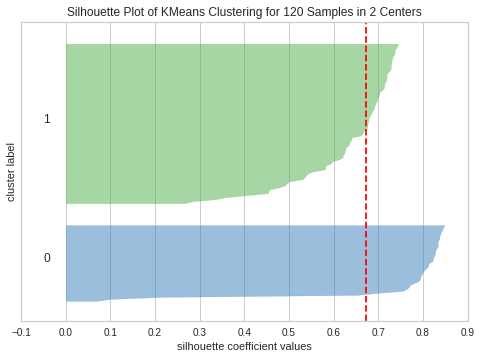

3


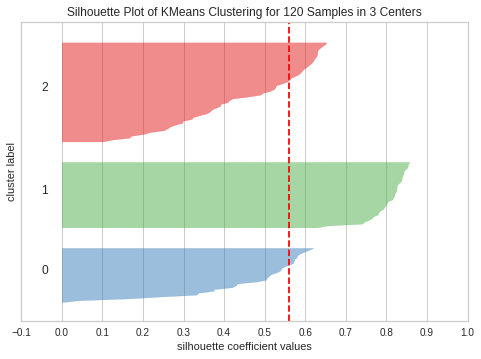

4


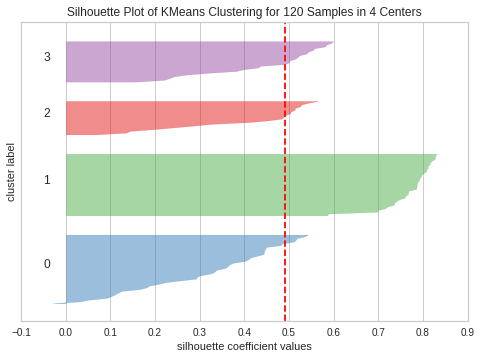

5


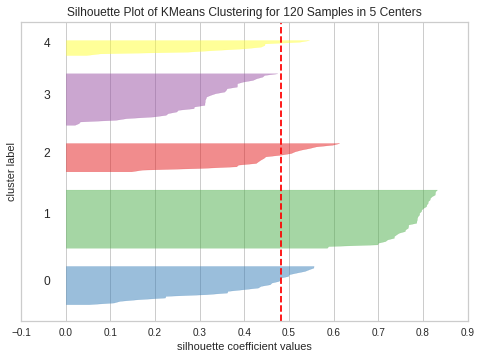

6


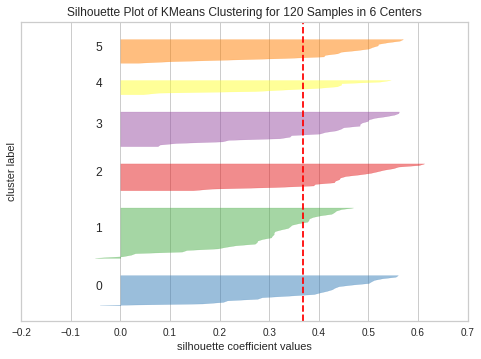

7


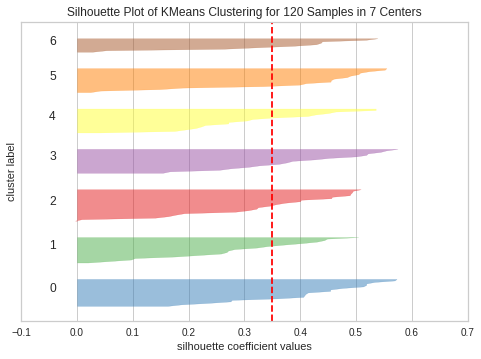

8


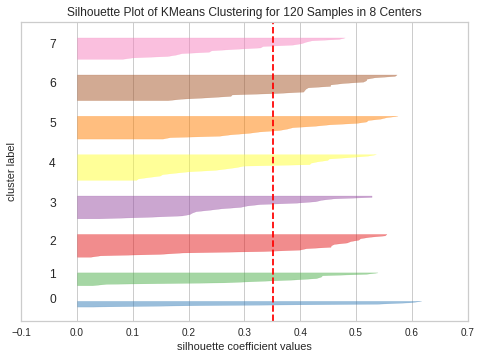

9


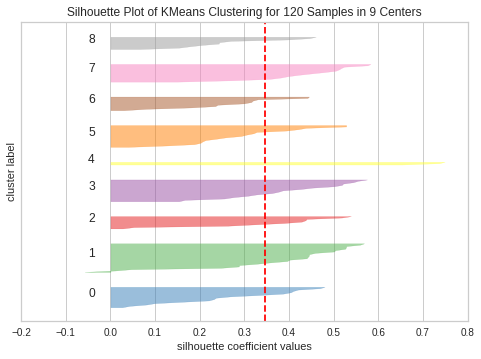

10


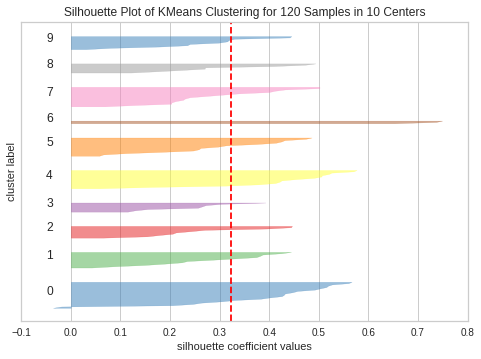

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
k_range = range(2,11)
for i in k_range:
  print(i)
  km=KMeans(n_clusters=i)
  visualizer = SilhouetteVisualizer(km)
  visualizer.fit(train_x)
  visualizer.poof()

In [ ]:
# 최적의 k를 할당하고 k-means model 훈련
k = 3
km = KMeans(n_clusters=k).fit(train_x)
train_cluster = km.labels_
train_cluster

array([2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2,
       2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2,
       0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 0, 1], dtype=int32)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "k-means"))
fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=train_y)),
               row=1, col=1
)
fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=train_cluster)),
               row=1, col=2
)
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "k-means"))
fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=train_y)),
               row=1, col=1
)
fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=train_cluster)),
               row=1, col=2
)
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
# prediction
test_cluster = km.fit_predict(test_x)
test_cluster

array([0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       0, 0, 2, 0, 0, 1, 0, 1], dtype=int32)

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "k-means"))
fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=test_y)),
               row=1, col=1
)
fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=test_cluster)),
               row=1, col=2
)
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "k-means"))
fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=test_y)),
               row=1, col=1
)
fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=test_cluster)),
               row=1, col=2
)
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
# 수치화 평가 - accuracy score
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_y, train_cluster)
print(train_acc)

0.11666666666666667


In [ ]:
test_acc = accuracy_score(test_y, test_cluster)
print(test_acc)

0.0


In [ ]:
# 실제 cluster명과 매칭해주는 함수 만들기
import scipy

def find_matching_cluster(cluster_case, actual_labels, cluster_labels):
  matched_cluster={}
  actual_case = list(set(actual_labels))
  for i in cluster_case:
    idx = cluster_labels == i
    new_label = scipy.stats.mode(actual_labels[idx])[0][0]
    actual_case.remove(new_label)
    matched_cluster[i] = new_label
    print(f"훈련된 label명 : {i} >> 가장 빈번한 실제 label명 : {new_label}")
  return matched_cluster

In [ ]:
km_train_case = list(set(train_cluster))
print(km_train_case)

[0, 1, 2]


In [ ]:
train_param_dict = find_matching_cluster(km_train_case, train_y,train_cluster)
train_param_dict

훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 2
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 0
훈련된 label명 : 2 >> 가장 빈번한 실제 label명 : 1


{0: 2, 1: 0, 2: 1}

In [ ]:
km_test_case = list(set(test_cluster))
print(km_test_case)

[0, 1, 2]


In [ ]:
test_param_dict = find_matching_cluster(km_test_case, test_y,test_cluster)
test_param_dict

훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 2
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 0
훈련된 label명 : 2 >> 가장 빈번한 실제 label명 : 1


{0: 2, 1: 0, 2: 1}

In [ ]:
train_new_labels = [train_param_dict[label] for label in train_cluster]
test_new_labels = [test_param_dict[label] for label in test_cluster]

In [ ]:
train_acc = accuracy_score(train_y, train_new_labels)
test_acc = accuracy_score(test_y, test_new_labels)

print(train_acc, test_acc)

0.875 0.8333333333333334


### Clustering : Agglomerative 알고리즘(계층군집)
- 데이터 자체의 분포와 어떻게 grouping을 하고자 하는지에 따라 다른 알고리즘이 사용될 수 있음.

### Kmeans VS Agglomerative 비교

[k-means 최적의 환경]
- 원형 혹은 구 형태의 분포
- 동일한 데이터 분포
- 동일한 밀집도
- 군집의 센터에 주로 밀집된 분포
- Noise와 outlier가 적은 분포

[k-means의 민감성]
- Noise와 outlier에 민감함
- 처음 시작하는 점에 따라 결과에 영향을 줌.
- k값을 직접 설정해야하는 어려움이 있음.

In [ ]:
# Agglomerative 모듈 import
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg1 = AgglomerativeClustering(n_clusters=3, linkage="ward", affinity='euclidean').fit(train_x)
agg1

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [ ]:
# 훈련된 label 저장
agg1_labels = agg1.labels_

# 원래의 label과 Agglomerative 알고리즘 결과를 시각화로 비교
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "agg1_cluster"))

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=train_y)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=agg1_labels)),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# 훈련된 label 저장
agg1_labels = agg1.labels_

# 원래의 label과 Agglomerative 알고리즘 결과를 시각화로 비교
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "agg1_cluster"))

fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=train_y)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=agg1_labels)),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# clustering 결과 수치적 평가
agg1_case = list(set(agg1_labels))
print(agg1_case)
# 매칭되는 dictionary 생성
agg1_perm_dict = find_matching_cluster(agg1_case, train_y, agg1_labels)
print(agg1_perm_dict)
# 생성한 dict 변수를 사용하여 훈련된 결과 라벨 변경
agg1_new_labels = [agg1_perm_dict[label] for label in agg1_labels]
print(agg1_new_labels)

[0, 1, 2]
훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 1
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 0
훈련된 label명 : 2 >> 가장 빈번한 실제 label명 : 2
{0: 1, 1: 0, 2: 2}
[1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0]


In [ ]:
# 새로 할당된 cluster 명으로 다시 acc 계산하고 k-means 결과값과 비교
# acc는 k-means의 시작점과 train/test 분류의 영향으로 매번 상이하게 나올 수 있음.
agg1_acc = accuracy_score(train_y, agg1_new_labels)
agg1_acc

0.8666666666666667

In [ ]:
# dendrogram 그리기
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# linkage matrix 구조 파악하기
sample_arr = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
sample_arr

[[2], [8], [0], [4], [1], [9], [9], [0]]

In [ ]:
sample_linkage = linkage(sample_arr)
print(sample_linkage)

[[ 2.  7.  0.  2.]
 [ 5.  6.  0.  2.]
 [ 0.  4.  1.  2.]
 [ 8. 10.  1.  4.]
 [ 1.  9.  1.  3.]
 [ 3. 11.  2.  5.]
 [12. 13.  4.  8.]]


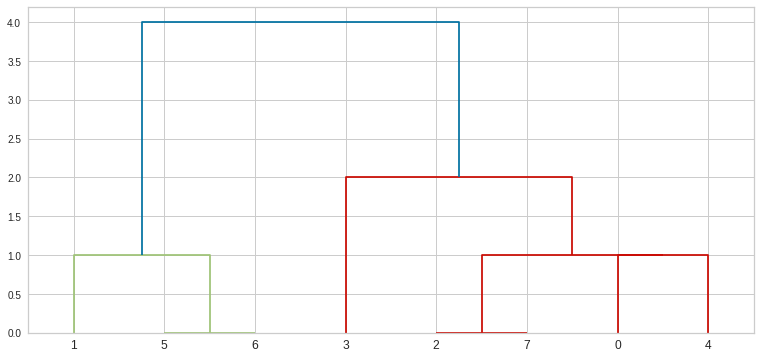

In [ ]:
fig = plt.figure(figsize=(13, 6))
dn = dendrogram(sample_linkage)
plt.show()

In [ ]:
# linkage_matrix 생성하는 함수 만들기

def create_linkage(model):
  # 각 노드 총 point수 계산하기
  counts = np.zeros(model.children_.shape[0]) #children 길이만큼 0을 채운 array
  n_samples = len(model.labels_) # 각 point의 cluster label.
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1 #leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
  return linkage_matrix

In [ ]:
# Dendrogram 그리기 위해선 distance_threshold와 n_cluster parameter 조정 필요.
agg1_dend = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(train_x)
agg1_dend

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

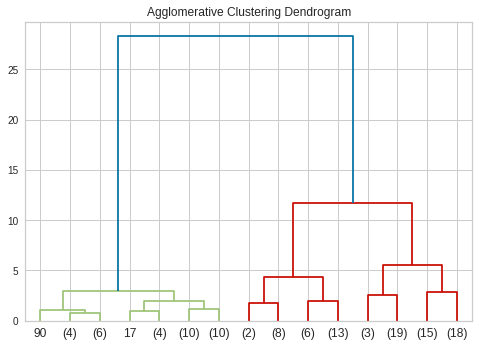

In [ ]:
# x축 - 실제 point(혹은 각 node에 포함되는 point 수)
plt.title("Agglomerative Clustering Dendrogram")
linkage_matrix = create_linkage(agg1_dend)
dendrogram(linkage_matrix, truncate_mode="level", p=3)
plt.show()

In [ ]:
# dendrogram에서 정한 cluster 수로 모델 훈련시키기
agg1 = AgglomerativeClustering(n_clusters=4, linkage="ward", affinity="euclidean").fit(train_x)
agg1

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [ ]:
agg1_labels = agg1.labels_

fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "agg1_cluster"))

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=train_y)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=agg1_labels)),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
agg1_labels = agg1.labels_

fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "agg1_cluster"))

fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=train_y)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=agg1_labels)),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

### 그럼 Agglomerative는 언제 사용해야할까?

[Hierarchical clustering의 장단점]
- cluster 수(k)를 정하지 않아도 사용 가능.
- random point에서 시작하지 않으므로, 동일한 결과가 나옴.
- dendrogram을 통해 전체적인 군집을 확인할 수 있음 (nested clusters).

- 대용량 데이터에 비효율적임 (계산이 많음)

-> 샘플 데이터로 가볍게 군집분포를 확인하거나 nested clusters를 확인하기에 유용함.

-> HDBSCAN의 기초지식

### DBSCAN 알고리즘
[장점]
- K-means와 달리 최초 k(군집수)를 직접 할당하지 않음.
- Density(밀도)에 따라서 군집을 나누기 때문에, 기하학적인 모양을 갖는 분포도 적용 가능.
- Outlier 구분이 가능함.

In [ ]:
# DBSCAN - 비구형 데이터 생성하기
from sklearn.datasets import make_moons # 랜덤한 분포 생성

moon_data, moon_labels = make_moons(n_samples=400, noise=0.1, random_state=42)
moon_data[:5]

array([[-0.04405185,  0.43607778],
       [ 0.69223045, -0.40111946],
       [ 0.8281978 ,  0.54152189],
       [ 0.17881243,  0.26886231],
       [ 0.0917154 ,  0.94611799]])

In [ ]:
moon_labels

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
moon_data_df = pd.DataFrame(moon_data, columns=["x","y"])
moon_data_df["label"] = moon_labels
moon_data_df.head()

,x,y,label
0,-0.044052,0.436078,1
1,0.692230,-0.401119,1
2,0.828198,0.541522,0
3,0.178812,0.268862,1
4,0.091715,0.946118,0


In [ ]:
# noise = 0.1
fig = px.scatter(moon_data_df, x="x", y="y", color="label")
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
# noise = 0.9
fig = px.scatter(moon_data_df, x="x", y="y", color="label")
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# DBSCAN의 파라미터인 eps(radius of neighborhood)와 min_samples(minimum number of data points) 설정
dbscan = DBSCAN(eps=0.2, min_samples=6)

In [ ]:
dbscan.fit(moon_data)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [ ]:
dbscan_label = dbscan.labels_
dbscan_label[:10]

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
set(dbscan_label)

{-1, 0, 1}

In [ ]:
moon_data_df["dbscan_label"] = dbscan_label

fig = px.scatter(moon_data_df, x="x", y="y", color="dbscan_label")
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
# eps 파라미터가 각각 다를 때 cluster 차이 비교
for eps in [0.1, 0.2, 0.5]:
  dbscan = DBSCAN(eps=eps, min_samples=6).fit(moon_data)
  dbscan_label = dbscan.labels_
  print(f"eps:{eps} ->> label 수 : {len(set(dbscan_label))}")
  moon_data_df["dbscan_label"] = dbscan_label

  fig = px.scatter(moon_data_df, x="x", y="y", color="dbscan_label")
  fig.update_layout(width=600, height=500)
  fig.show()

eps:0.1 ->> label 수 : 19


eps:0.2 ->> label 수 : 3


eps:0.5 ->> label 수 : 1


In [ ]:
# min_samples 파라미터가 각각 다를 때 cluster 차이 비교
for min_samples in [2, 6, 30]:
  dbscan = DBSCAN(eps=0.2, min_samples=min_samples).fit(moon_data)
  dbscan_label = dbscan.labels_
  print(f"min_samples:{min_samples} ->> label 수 : {len(set(dbscan_label))}")
  moon_data_df["dbscan_label"] = dbscan_label

  fig = px.scatter(moon_data_df, x="x", y="y", color="dbscan_label")
  fig.update_layout(width=600, height=500)
  fig.show()

min_samples:2 ->> label 수 : 3


min_samples:6 ->> label 수 : 3


min_samples:30 ->> label 수 : 1


### DBSCAN과 K-means 성능 비교

In [ ]:
moon_km = KMeans(n_clusters=2).fit(moon_data)
moon_km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
compare_kmeans_clusters = dict(zip(moon_km.labels_, moon_labels))
compare_kmeans_clusters

{0: 1, 1: 0}

In [ ]:
moon_data_df["kmeans_label"] = moon_km.labels_
moon_data_df["kmeans_label"] = moon_data_df["kmeans_label"].astype(str)

moon_dbscan = DBSCAN(eps=0.2, min_samples=6).fit(moon_data)
moon_data_df["dbscan_label"] = moon_dbscan.labels_
moon_data_df["dbscan_label"] = moon_data_df["dbscan_label"].astype(str)

moon_data_df.head()

,x,y,label,dbscan_label,kmeans_label
0,-0.044052,0.436078,1,0,1
1,0.692230,-0.401119,1,0,0
2,0.828198,0.541522,0,1,0
3,0.178812,0.268862,1,0,1
4,0.091715,0.946118,0,1,1


In [ ]:
for label_case in ["dbscan_label", "kmeans_label"]:
    fig = px.scatter(moon_data_df, x="x", y="y", color=label_case)
    fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
    fig.show()

### 수치적으로 결과 평가

In [ ]:
def find_matching_cluster(cluster_case, actual_labels, cluster_labels):
  matched_cluster={}
  temp_labels = [i+100 for i in range(100)]
  actual_case = list(set(actual_labels))

  for i in cluster_case:
    if len(actual_case) > 0:
      idx = cluster_labels == i
      new_label = scipy.stats.mode(actual_labels[idx])[0][0]
      print(actual_case, "-", new_label)
      if new_label in actual_case:
        actual_case.remove(new_label)
      else:
        new_label=temp_labels[new_label]
        temp_labels.remove(new_label)
        # 매칭되는 실제 label 명을 dict 형태로 저장
      matched_cluster[i] = new_label
    else:
      new_label=None
    print(f"훈련된 label명 : {i} >> 가장 빈번한 실제 label명 : {new_label}")
  return matched_cluster

In [ ]:
# 훈련된 dbscan label을 데이터가 많은 순서로 정렬
dbscan_labels = moon_dbscan.labels_
dbscan_case_dict = dict((x, list(dbscan_labels).count(x)) for x in set(dbscan_labels))
sorted_dbscan_case = sorted(dbscan_case_dict, key=dbscan_case_dict.get, reverse=True)
sorted_dbscan_case

[1, 0, -1]

In [ ]:
dbscan_perm_dict = find_matching_cluster(sorted_dbscan_case, moon_labels, dbscan_labels)
dbscan_perm_dict

[0, 1] - 0
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 0
[1] - 1
훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 1
훈련된 label명 : -1 >> 가장 빈번한 실제 label명 : None


{0: 1, 1: 0}

In [ ]:
# label 매칭하기
dbscan_new_labels = [label if label not in dbscan_perm_dict else dbscan_perm_dict[label] for label in dbscan_labels] 
print(np.array(dbscan_new_labels[:80]))
print(np.array(dbscan_labels[:80]))

[ 1  1  0  1  0  0  1  0  1  0  0  1  0  0  0  0  1  1  1  1  0  0  1  1
  0  1  0  1  1  0  1  0  1  0  1  0  0  1  0  0  1  0  0  0  0  1  0  0
  0  0  0  1  1  0  1  0  1  0  0  0  0  1  1  0  0  0  1  1 -1  0  1  0
  0  0  1  1  1  1  0  1]
[ 0  0  1  0  1  1  0  1  0  1  1  0  1  1  1  1  0  0  0  0  1  1  0  0
  1  0  1  0  0  1  0  1  0  1  0  1  1  0  1  1  0  1  1  1  1  0  1  1
  1  1  1  0  0  1  0  1  0  1  1  1  1  0  0  1  1  1  0  0 -1  1  0  1
  1  1  0  0  0  0  1  0]


In [ ]:
kmean_labels = moon_km.labels_
km_case = list(set(kmean_labels))
kmean_perm_dict = find_matching_cluster(km_case, moon_labels, kmean_labels)
kmean_perm_dict

[0, 1] - 1
훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 1
[0] - 0
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 0


{0: 1, 1: 0}

In [ ]:
kmeans_new_labels = [kmean_perm_dict[label] for label in kmean_labels]

In [ ]:
moon_kmeans_acc = accuracy_score(moon_labels, kmeans_new_labels)
print(f"Accuracy score of K-means: {round(moon_kmeans_acc,4)}")

moon_dbscan_acc = accuracy_score(moon_labels, dbscan_new_labels)
print(f"Accuracy score of DBSCAN: {round(moon_dbscan_acc,4)}")

Accuracy score of K-means: 0.74
Accuracy score of DBSCAN: 0.9925


### DBSCAN - silhouette score 비교하기

In [ ]:
km_sc_value = silhouette_score(np.array(moon_data), kmean_new_labels, metric="euclidean", sample_size=None, random_state=None)
print(f"Silhouette score of K-means: {round(km_sc_value, 4)}")

dbscan_sc_value = silhouette_score(np.array(moon_data), dbscan_new_labels, metric="euclidean", sample_size=None, random_state=None)
print(f"Silhouette score of K-means: {round(dbscan_sc_value, 4)}")

Silhouette score of K-means: 0.4831
Silhouette score of K-means: 0.2634


[silhouette score 특징]

- silhouette score 계산 방법의 특징 때문에,
구형이 아닌 경우, 실제 시각화에서는 dbscan의 군집이 합리적이게 보이나,
- silhouette score 점수는 오히려 낮게 나올 수 있음.
> (데이터 분포가 구형이 아닌 경우, 각 군집의 중심점이 다른 군집과 가까워질 수 있기 때문,)